In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
class AdalineGD(object):
    """
    Adapative Linear Neuron, Gradient Descent
    
    Parameter (퍼셉트론과 유사한 것 같다)
    -----------------
    eta : float
     학습률 : (0.0 과 1.0 사이) 
    n_iter : int
     훈련 데이터셋 반복 횟수
    random_state : int
     가중치 무작위 초기화를 위한 난수 생성기 시드
     
     
    Attribution
    ----------------------
    w_ : 1d_arr
     학습된 가중치
    cost_ : list
     epoch 마다 누적된 cost function 의 제곱 합
    
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        훈련 데이터 학습
        
        Parameter
        _______________
        X : {arr-like}, shape = [n_samples, n_features]
         n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : arr-like, shape = [n_samples]
         타깃 값
         
        Return
        ________________
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale = 0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        """ 최종 입력 계산 """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """ 선형 활성화 계산 """
        return X
    
    def predict(self, X):
        """ 단위 계단 함수를 사용하여 클래스 레이블을 반환합니다 """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [12]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header=None)

y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

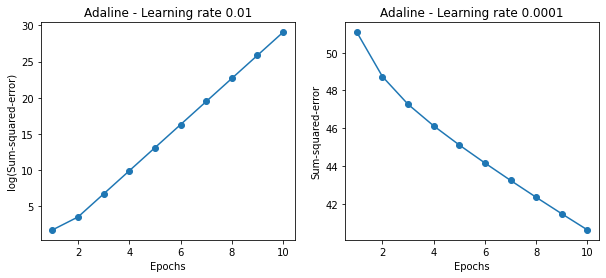

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

- 두 Cost Function 의 문제점

- 왼쪽의 그래프는 학습률이 너무 클 떄 발생하는 문제 점이다. Cost Fucntion을 최소화하지 못하고, 오차는 Epoch 마다 점점 더 커진다, 전역 최솟값을 지나쳤기 때문이다.
- 오른쪽 그래프에서는 비용이 감소하지만 학습률 0.0001은 너무 작기 때문에 알고리즘이 전역 최솟값에 수렴하려면 아주 많은 에포크가 필요하다.

### Standardization (표준화)
- 데이터에 표준 정규 분포의 성질을 부여하여 경사 하강법 학습이 좀 더 빠르게 수행되도록 돕는다.
- 표준화는 각 특성의 평균을 0에 맞추고 특성의 표준 편차를 1로 만든다.

In [27]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 샘플의 산점도를 그린다.
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')

In [28]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

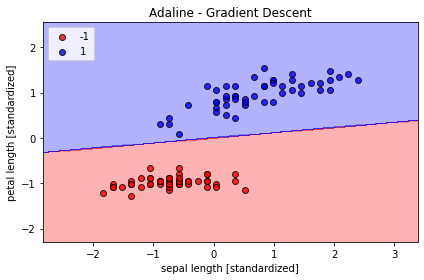

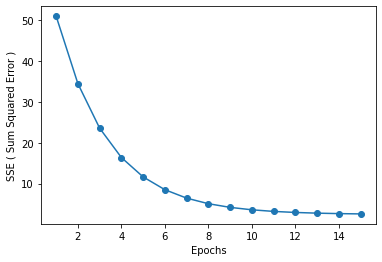

In [29]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range (1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('SSE ( Sum Squared Error )')
plt.show()

In [31]:
class AdalineSGD(object):
    """
    Adapative Linear Neuron, Stochastic Gradient Descent
    
    Parameter
    -----------------
    eta : float
     학습률 : (0.0 과 1.0 사이) 
    n_iter : int
     훈련 데이터셋 반복 횟수
    shuffle : bool (default == True)
     True 로 설정하면 같은 반복이 되지 않도록 Epoch 마다 훈련 데이터를 섞는다.
    random_state : int
     가중치 무작위 초기화를 위한 난수 생성기 시드
     
     
    Attribution
    ----------------------
    w_ : 1d_arr
     학습된 가중치
    cost_ : list
     모든 훈련 샘플에 대해 epoch 마다 누적된 평균 cost function의 제곱합.
    
    """
    
    def __init__(self, eta = 0.01, n_iter = 10, shuffle=True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        훈련 데이터 학습
        
        Parameter
        _______________
        X : {arr-like}, shape = [n_samples, n_features]
         n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : arr-like, shape = [n_samples]
         타깃 벡터
         
        Return
        ________________
        self : object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
            
        return self
    
    def partial_fit(self, X, y):
        """ 가중치를 다시 초기화하지 않고 훈련 데이터를 학습한다"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        
        return self
    
    def _shuffle(self, X, y):
        """ 훈련 데이터를 섞는다 """
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """ 랜덤한 작은 수로 가중치를 초기화한다 """
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale = 0.01, size = 1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """Adaline 학습 규칙을 적용하여 가중치를 업데이트한다"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        return cost
    
    def net_input(self, X):
        """ 최종 입력 계산 """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """ 선형 활성화 계산 """
        return X
    
    def predict(self, X):
        """ 단위 계단 함수를 사용하여 클래스 레이블을 반환합니다 """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

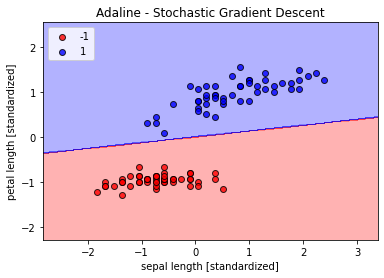

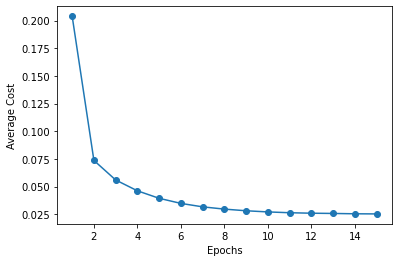

In [33]:
ada = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range (1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

- 평균 비용이 상당히 빠르게 감소한다. 15번째 Epoch 이후 최종 결정 경계는 배치 경사 하강법과 거의 비슷해 보임.
- 스트리밍 데이터를 이용하는 Online 학습 방식으로는 샘플마다 partial_fit 메서드를 호출하면 된다
- ex) ada.partial_fit(X_std[0, :], y[0]) 이 있다.